In [21]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras import regularizers , callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.callbacks import EarlyStopping, Callback
import time

In [22]:
# data = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/new_concatenated_data_7_theta.csv')
data = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/mirror_image/data_mirror_new_theta.csv')


In [23]:
input_train =data[['traps_y','traps_z','theta']].values
output_train =data[['measured_y','measured_z','theta']].values

from sklearn.preprocessing import StandardScaler

# scaler1 = StandardScaler()

# input_train_scaled = scaler1.fit_transform(input_train)
# output_train_scaled = scaler1.transform(output_train)

input_train_scaled = input_train
output_train_scaled = output_train

input_train_scaled = input_train_scaled.reshape((input_train_scaled.shape[0], 1, input_train_scaled.shape[1]))

# X_train, X_test, y_train, y_test = train_test_split(input_train_scaled, output_train_scaled, test_size=0.15, random_state=42)


indices = np.arange(input_train.shape[0])

X_train, X_test, y_train, y_test, train_indices,test_indices = train_test_split(
    input_train_scaled, output_train_scaled, indices, test_size=0.30, random_state=42)


model1 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(1, 3), return_sequences=False),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(output_train.shape[1])
])

model1.compile(loss='mean_squared_error', optimizer='adam')

early_stopping_callback = callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

start_time_training = time.time()
history = model1.fit(X_train, y_train, epochs=700, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])
end_time_training = time.time()
training_time = end_time_training - start_time_training

start_time_inference = time.time()
predictions = model1.predict(X_test)
end_time_inference = time.time()



Epoch 1/700
195/195 [==============================] - 2s 4ms/step - loss: 1348.4797 - val_loss: 5.7449
Epoch 2/700
195/195 [==============================] - 1s 3ms/step - loss: 2.0436 - val_loss: 1.3312
Epoch 3/700
195/195 [==============================] - 1s 3ms/step - loss: 1.0830 - val_loss: 0.9037
Epoch 4/700
195/195 [==============================] - 1s 3ms/step - loss: 0.7676 - val_loss: 0.6826
Epoch 5/700
195/195 [==============================] - 0s 3ms/step - loss: 0.6249 - val_loss: 0.6139
Epoch 6/700
195/195 [==============================] - 0s 2ms/step - loss: 0.5391 - val_loss: 0.4860
Epoch 7/700
195/195 [==============================] - 1s 3ms/step - loss: 0.4918 - val_loss: 0.4608
Epoch 8/700
195/195 [==============================] - 0s 2ms/step - loss: 0.4829 - val_loss: 0.4263
Epoch 9/700
195/195 [==============================] - 1s 3ms/step - loss: 0.4534 - val_loss: 0.4468
Epoch 10/700
195/195 [==============================] - 1s 3ms/step - loss: 0.4229 - val

Epoch 161/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0767 - val_loss: 0.0907
Epoch 162/700
195/195 [==============================] - 1s 3ms/step - loss: 0.0794 - val_loss: 0.0415
Epoch 163/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0702 - val_loss: 0.0733
Epoch 164/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0669
Epoch 165/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0754 - val_loss: 0.0492
Epoch 166/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0643 - val_loss: 0.0751
Epoch 167/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0756 - val_loss: 0.0979
Epoch 168/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0597 - val_loss: 0.0747
Epoch 169/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0800 - val_loss: 0.1546
Epoch 170/700
195/195 [==============================] - 0s 2ms/step - lo

In [24]:
inference_time = end_time_inference - start_time_inference
print(f'Training Time: {training_time:.2f} seconds')
print(f'Inference Time: {inference_time:.4f} seconds per sample')

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


loss_values_from_third_epoch = history.history['loss'][1:]
val_loss_values = history.history['val_loss'][1:]

# Now plot starting from the 3rd epoch

plt.plot(loss_values_from_third_epoch, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.savefig('Model Training and Validation Loss.png', format='png')

# Optionally, you can show the plot
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

In [27]:
# predictions_inverse_scaled = scaler1.inverse_transform(predictions)
# predictions_df = pd.DataFrame(predictions_inverse_scaled)
# predictions_df
predictions_df = pd.DataFrame(predictions)
predictions_df

In [28]:


predictions_df.columns = ['0','1','2']  # Clear any existing column names
predictions_df.columns = [ 'measured_y', 'measured_z','theta']

# predictions_df.columns = ['0','1']  # Clear any existing column names
# predictions_df.columns = ['measured_y', 'measured_z']

In [29]:
# bead_x = data.loc[test_indices, 'bead_x'].values
reference_y = data.loc[test_indices, 'reference_y'].values
reference_z = data.loc[test_indices, 'reference_z'].values


lookup_table = pd.DataFrame({
    'theta': predictions_df['theta'],
#     'measured_x': predictions_df['measured_x'],
    'measured_y': predictions_df['measured_y'],
    'measured_z': predictions_df['measured_z'],
#     'traps_x': input_train[test_indices, 1],
    'traps_y': input_train[test_indices, 0],
    'traps_z': input_train[test_indices, 1],
#     'simulated_x': bead_x,
    'reference_y': reference_y,
    'reference_z': reference_z,
})
lookup_table

In [30]:

# Plot the predictions vs reference positions
plt.figure(figsize=(10, 6))
plt.scatter(lookup_table['traps_y'], lookup_table['traps_z'], color='blue', label=' trap Positions', lw=1)
plt.scatter(lookup_table['reference_y'], lookup_table['reference_z'], color='black', label=' simulated Positions')
plt.scatter(lookup_table['measured_y'], lookup_table['measured_z'], color='pink', label='measured Positions')

plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.legend()
plt.show()

In [31]:

# # Plot the predictions vs reference positions
# plt.figure(figsize=(10, 6))
# plt.scatter(data['traps_y'], data['traps_z'], color='blue', label=' trap Positions', lw=1)
# plt.scatter(data['bead_y'], data['bead_z'], color='black', label=' simulated Positions')
# plt.scatter(data['measured_y'], data['measured_z'], color='pink', label='measured Positions')

# plt.xlabel('Bead Y')
# plt.ylabel('Bead Z')
# plt.legend()
# plt.show()

In [32]:
# theta_lookup=lookup_table.sort_values(by='theta')['theta'].reset_index(drop=True)


In [33]:
# lookup_table = lookup_table.sort_values(by='theta').reset_index(drop=True)
# lookup_table

In [34]:
# change of logic - using theta static and static reference positions calculations

In [35]:
theta_pred = predictions_df.sort_values(by='theta')['theta']
theta_lookup=predictions_df['theta']
theta_lookup

In [36]:
h_center = tf.constant(0.1194, dtype=tf.float32)
q_y = tf.cos(theta_lookup) - (tf.sin(theta_lookup)**2 / tf.sqrt(tf.constant(2.0, dtype=tf.float32)))
q_z = tf.sin(theta_lookup) * tf.cos(theta_lookup)
bead_y = q_y*42.2
bead_z = (q_z + h_center)*42 +114.40

reference_positions_final = np.column_stack((bead_y, bead_z, theta_lookup))
reference_positions_final = tf.convert_to_tensor(reference_positions_final, dtype=tf.float32)


In [37]:
# #checking the range of values for all parameters involved
# plt.figure(figsize=(10, 6))
# plt.scatter(reference_positions[:, 1], reference_positions[:, 2], color='blue', label='simulation', s=1)
# # plt.scatter(input_nn2[:, 0], input_nn2[:, 1], color='pink', label='measured positions scaled', lw=1)
# plt.scatter(output_nn2[:, 0], output_nn2[:, 1], color='green', label='traps scaled', s=1)


# plt.xlabel('Bead Y')
# plt.ylabel('Bead Z')
# plt.legend()
# plt.show()

In [38]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Extract and scale input and output data
input_nn2 = lookup_table[['measured_y', 'measured_z', 'theta']].values
output_nn2 = lookup_table[['traps_y', 'traps_z', 'reference_y', 'reference_z',  'theta']].values

# Reshape the data for LSTM input
input_scaled_nn2 = input_nn2.reshape((input_nn2.shape[0], 1, input_nn2.shape[1]))
output_scaled_nn2 = output_nn2

In [39]:

# Split the data into training and testing sets
X_train_nn2, X_test_nn2, y_train_nn2, y_test_nn2 = train_test_split(input_scaled_nn2, output_scaled_nn2, test_size=0.15, random_state=42)

# Define the second model architecture
model2 = Sequential([
    LSTM(64, activation='relu', input_shape=(1, input_nn2.shape[1]), return_sequences=False),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(output_nn2.shape[1])
])

def custom_cost_function(y_true_nn2, y_pred_nn2):
    batch_size = tf.shape(y_pred_nn2)[0]

    # Extract theta and predicted positions from y_pred
    traps_pred = y_pred_nn2[:, 0:2]
    theta_pred = y_pred_nn2[:, 4:5]

    # Reshape to match the input shape for model1
    input_for_nn1 = tf.concat([traps_pred, theta_pred], axis=1)
    input_for_nn1 = tf.expand_dims(input_for_nn1, axis=1)  # Reshape

    # Get predicted bead positions from model1
    predicted_bead_positions = model1(input_for_nn1, training=False)
    
    reference_positions_final_batch = tf.gather(reference_positions_final, tf.range(batch_size))

    # Calculate deviation
    deviation = tf.reduce_mean(tf.reduce_sum(tf.abs(predicted_bead_positions - reference_positions_final_batch), axis=1))  # Only consider y and z

    return deviation


# Compile and train the model with the custom cost function
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
model2.compile(loss=custom_cost_function, optimizer='adam')



start_time_training = time.time()
history = model2.fit(X_train_nn2, y_train_nn2, epochs=400, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])
end_time_training = time.time()
training_time = end_time_training - start_time_training

start_time_inference = time.time()
y_pred_nn2 = model2.predict(X_test_nn2)
end_time_inference = time.time()



In [40]:
inference_time = end_time_inference - start_time_inference
print(f'Training Time: {training_time:.2f} seconds')
print(f'Inference Time: {inference_time:.4f} seconds per sample')

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


loss_values_from_third_epoch = history.history['loss'][1:]
val_loss_values = history.history['val_loss'][1:]

# Now plot starting from the 3rd epoch

plt.plot(loss_values_from_third_epoch, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.savefig('Model Training and Validation Loss before theta static.png', format='png')

# Optionally, you can show the plot
plt.show()

In [42]:
# model2 = load_model('model2_static_theta.keras',custom_objects={'custom_cost_function': custom_cost_function})


In [43]:


start_time_training = time.time()
history = model2.fit(X_train_nn2, y_train_nn2, epochs=400, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])
end_time_training = time.time()
training_time = end_time_training - start_time_training

start_time_inference = time.time()
y_pred_nn2 = model2.predict(X_test_nn2)
end_time_inference = time.time()



In [44]:
np.save('y_test_nn2_before.npy', y_test_nn2)
np.save('y_pred_nn2_bfeore.npy', y_pred_nn2) 

In [46]:
y_test_nn2.shape

In [27]:
inference_time = end_time_inference - start_time_inference
print(f'Training Time: {training_time:.2f} seconds')
print(f'Inference Time: {inference_time:.4f} seconds per sample')

Training Time: 13.02 seconds
Inference Time: 0.0569 seconds per sample


Predictions: [[-28.192144  114.99934    14.731881    9.994627    2.8129823]
 [-27.610409  113.94848    13.855533   10.283898    2.8232286]
 [-29.02392   115.937904   16.52203    12.483407    2.9311597]
 [-28.244276  116.12379    14.475633   10.925865    3.028919 ]
 [-28.56321   115.36572    14.5979805  11.147677    2.8535726]]
Actual Outputs: [[ 39.2414473  112.241908    40.9570697  112.1522779    6.0864768 ]
 [-15.1346761  130.5742523  -15.854385   130.7872018    1.35116291]
 [-43.2773234  109.5770834  -43.0011119  109.3776441    2.79199028]
 [-43.9520199  135.890267   -43.9899584  136.2285029    3.55874181]
 [ -1.3659359  101.3608256   -1.4302622  101.0449194    5.31741571]]


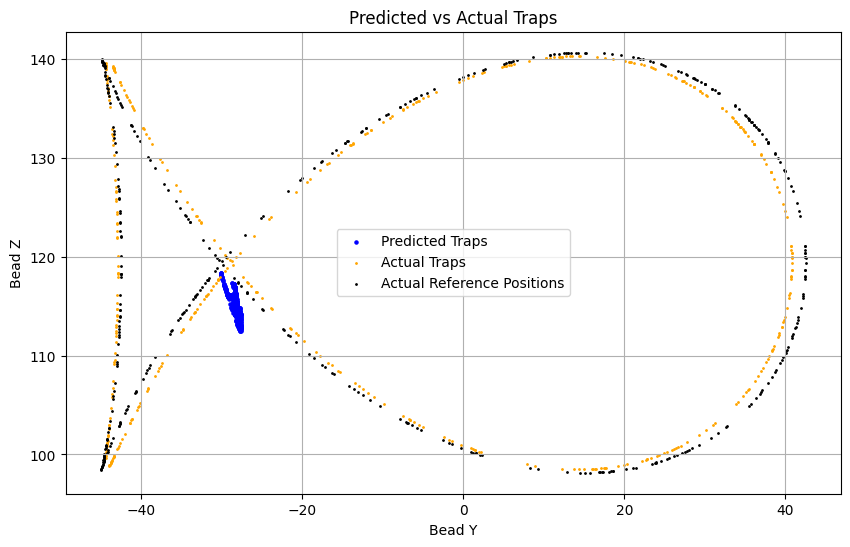

In [52]:

# Print predictions and actual outputs for comparison
print("Predictions:", y_pred_nn2[:5])
print("Actual Outputs:", y_test_nn2[:5])

# Plot the predictions vs reference positions
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_nn2[:, 0], y_pred_nn2[:, 1], color='blue', label='Predicted Traps', s=5)
plt.scatter(y_test_nn2[:, 0], y_test_nn2[:, 1], color='orange', label='Actual Traps',s=1)
plt.scatter(y_test_nn2[:, 2], y_test_nn2[:, 3], color='black', label='Actual Reference Positions',s=1)
# plt.scatter(lookup_table['measured_y'], lookup_table['measured_z'], color='pink', label='measured Positions')
plt.title('Predicted vs Actual Traps')
plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.legend()
plt.grid()

plt.savefig('Predicted vs Actual Traps.png', format='png')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
mae = mean_absolute_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
r2 = r2_score(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 797.3484087599867
Mean Absolute Error: 21.307754716647008
R-squared: -0.23031976552129507


In [30]:
y_test_nn2.shape

(446, 5)

In [31]:
input_for_model1 = np.concatenate([y_pred_nn2[:, 0:2], y_pred_nn2[:, 4:5]], axis=1)
input_for_model1 = input_for_model1.reshape((input_for_model1.shape[0], 1, input_for_model1.shape[1]))

# Predict using model1 with the final input
final_predictions = model1.predict(input_for_model1)
final_predictions

14/14 [==============================] - 0s 960us/step


array([[-27.732971 , 116.41965  ,   2.8799672],
       [-27.227812 , 115.374054 ,   2.902688 ],
       [-28.420103 , 117.48865  ,   2.9905837],
       ...,
       [-27.578602 , 118.871155 ,   3.1624186],
       [-27.392708 , 114.31795  ,   2.8299224],
       [-27.703102 , 115.96116  ,   2.8735924]], dtype=float32)

In [32]:
final_predictions.shape

(446, 3)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(final_predictions[:, 0:2], y_test_nn2[:, 2:4])
mae = mean_absolute_error(final_predictions[:, 0:2], y_test_nn2[:, 2:4])
r2 = r2_score(final_predictions[:, 0:2], y_test_nn2[:, 2:4])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 819.9810203998429
Mean Absolute Error: 21.66725873709462
R-squared: -2834.5334902517125


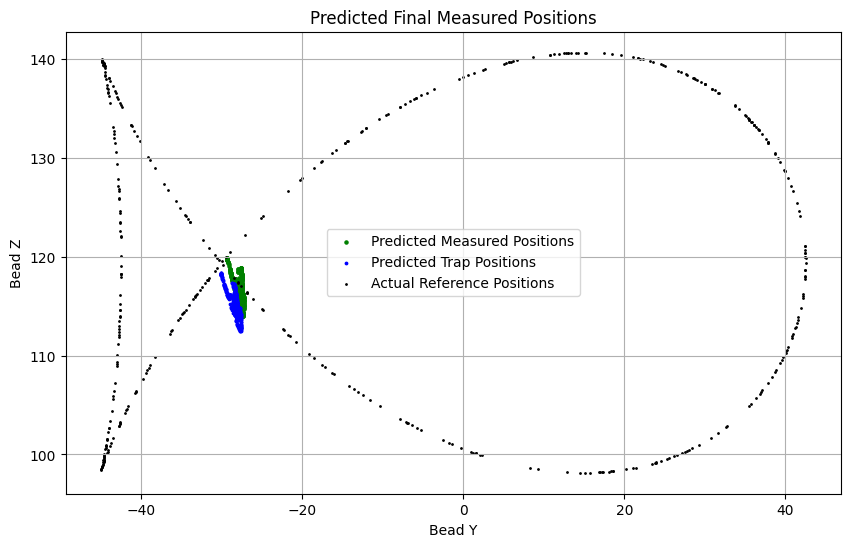

In [54]:
plt.figure(figsize=(10, 6))
# plt.scatter(y_test_nn2[:, 0], y_test_nn2[:, 1], color='orange', label='original trap Positions')

plt.scatter(final_predictions[:, 0], final_predictions[:, 1], color='green', label='Predicted Measured Positions',s=5)
plt.scatter(y_pred_nn2[:, 0], y_pred_nn2[:, 1], color='blue', label='Predicted Trap Positions', s=3)
plt.scatter(y_test_nn2[:, 2], y_test_nn2[:, 3], color='black', label='Actual Reference Positions',s=1)
plt.title('Predicted Final Measured Positions')
plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.grid()
plt.legend()

plt.savefig('Predicted Final Measured Positions.png',format='png')
plt.show()

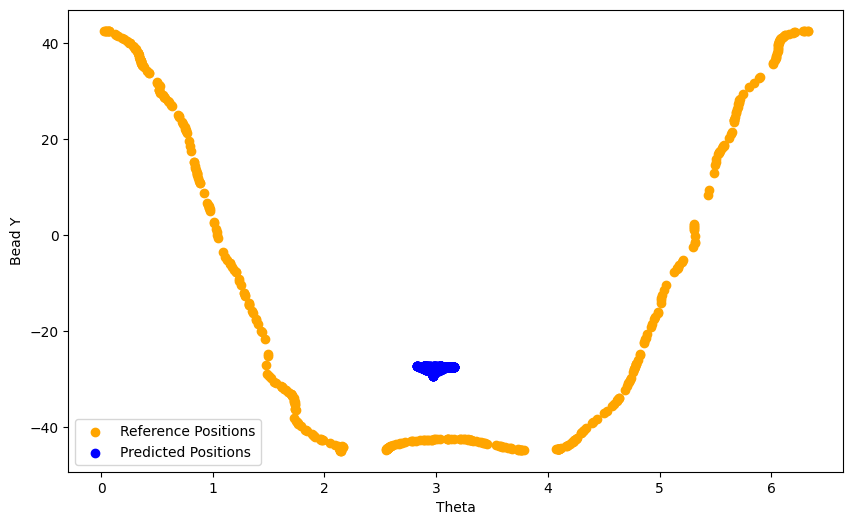

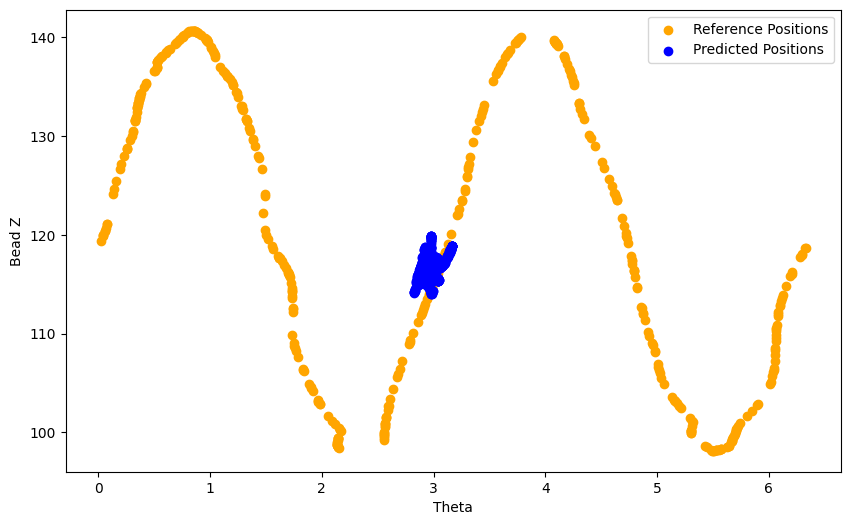

In [35]:

# Convert final predictions to DataFrame and add theta
final_predictions_df = pd.DataFrame(final_predictions, columns=['measured_y', 'measured_z', 'theta'])

# Sort final predictions by theta
final_predictions_sorted = final_predictions_df.sort_values(by=['theta','measured_y','measured_z'], ascending=True)

# Plotting predictions vs actual outputs sorted by theta
plt.figure(figsize=(10, 6))
plt.scatter(y_test_nn2[:, 4], y_test_nn2[:, 2], color='orange', label='Reference Positions')
plt.scatter(final_predictions_sorted['theta'], final_predictions_sorted['measured_y'], color='blue', label='Predicted Positions')
plt.xlabel('Theta')
plt.ylabel('Bead Y')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_nn2[:, 4], y_test_nn2[:, 3], color='orange', label='Reference Positions')
plt.scatter(final_predictions_sorted['theta'], final_predictions_sorted['measured_z'], color='blue', label='Predicted Positions')
plt.xlabel('Theta')
plt.ylabel('Bead Z')
plt.legend()
plt.show()

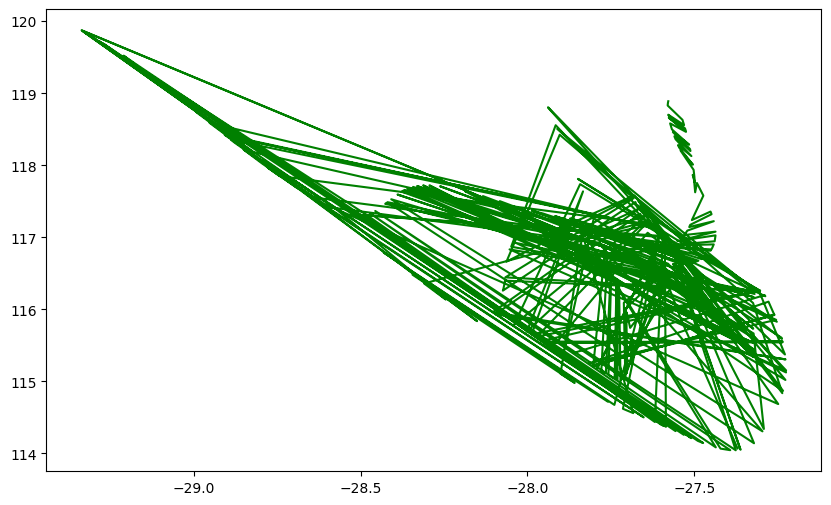

In [36]:
plt.figure(figsize=(10, 6))

plt.plot(final_predictions_sorted['measured_y'], final_predictions_sorted['measured_z'], color='green', label='Predicted measured Positions')


In [ ]:
# model2.save('model2_static_theta.keras')

In [ ]:
#trying out the models on sampled random data

In [ ]:
sampled_df = data.sample(n=1000, random_state=42)
sample_input =sampled_df[['traps_y','traps_z','theta']].values


In [ ]:
sampled_df = sample_input.reshape((sample_input.shape[0], 1, sample_input.shape[1]))

model1predictions = model1.predict(sampled_df)
model1predictions.shape

In [ ]:
model1predictions_df = pd.DataFrame(model1predictions)
sample_input_model2 =model1predictions_df[[0,1,2]].values
sampledmodel2_df = sample_input_model2.reshape((sample_input_model2.shape[0], 1, sample_input_model2.shape[1]))


In [ ]:
model2predictions = model2.predict(sampledmodel2_df)
model2predictions

In [ ]:
model2predictions_df = pd.DataFrame(model2predictions)
sample_input_model1 =model2predictions_df[[0,1,2]].values
finalpredictions_df = sample_input_model1.reshape((sample_input_model1.shape[0], 1, sample_input_model1.shape[1]))


In [ ]:
finalpredictions = model1.predict(finalpredictions_df)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(model1predictions[:,0], model1predictions[:,1], label='model1')
plt.scatter(model2predictions[:,0], model2predictions[:,1],label='model2')  

plt.scatter(finalpredictions[:,0], finalpredictions[:,1], label='model1')

plt.xlabel('Bead_y') 
plt.ylabel('Bead_z')  
plt.title('Random Sample of 1000 Points')
plt.legend()
plt.show()


In [ ]:
model2.summary

In [ ]:
# List all layers
for layer in model2.layers:
    print(layer.name, layer.input_shape, layer.output_shape, layer.count_params())


In [ ]:
# Get weights of a specific layer
layer_weights = model2.layers[0].get_weights()
print(layer_weights)


In [ ]:
beforetheta = np.abs(y_test_nn2 - y_pred_nn2)[:, 0]  # Replace with actual predictions

# Save the errors to .npy files
np.save('beforetheta.npy', beforetheta)